In [702]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [703]:
df = pd.read_csv("data.csv")
df.head(5)

,type,street,city,state,zip_code,beds,total_baths,sqft,year_built,sold_price,sold_date,county,stories,parking_garage
0,CONDOS,450 N Arlington Ave,Reno,NV,89503,1,1.0,570,1974,210000,9/13/2024,Washoe,1,1
1,TOWNHOMES,4339 Leeward Ln,Reno,NV,89502,2,1.5,1085,1988,400000,9/13/2024,Washoe,2,2
2,CONDOS,17000 Wedge Pkwy,Reno,NV,89511,2,2.0,1348,2005,485000,9/13/2024,Washoe,3,2
3,SINGLE_FAMILY,7845 Las Plumas Dr,Sparks,NV,89436,3,2.0,1706,2000,615000,9/13/2024,Washoe,1,3
4,TOWNHOMES,2011 Branch Ln,Reno,NV,89509,2,2.0,1169,1973,400000,9/13/2024,Washoe,1,2


In [704]:
df.columns

Index(['type', 'street', 'city', 'state', 'zip_code', 'beds', 'total_baths',
       'sqft', 'year_built', 'sold_price', 'sold_date', 'county', 'stories',
       'parking_garage'],
      dtype='object')

In [705]:
df.shape

(26112, 14)

In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26112 entries, 0 to 26111
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            26112 non-null  object 
 1   street          26112 non-null  object 
 2   city            26112 non-null  object 
 3   state           26112 non-null  object 
 4   zip_code        26112 non-null  int64  
 5   beds            26112 non-null  int64  
 6   total_baths     26112 non-null  float64
 7   sqft            26112 non-null  int64  
 8   year_built      26112 non-null  int64  
 9   sold_price      26112 non-null  int64  
 10  sold_date       26112 non-null  object 
 11  county          26112 non-null  object 
 12  stories         26112 non-null  int64  
 13  parking_garage  26112 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 2.8+ MB


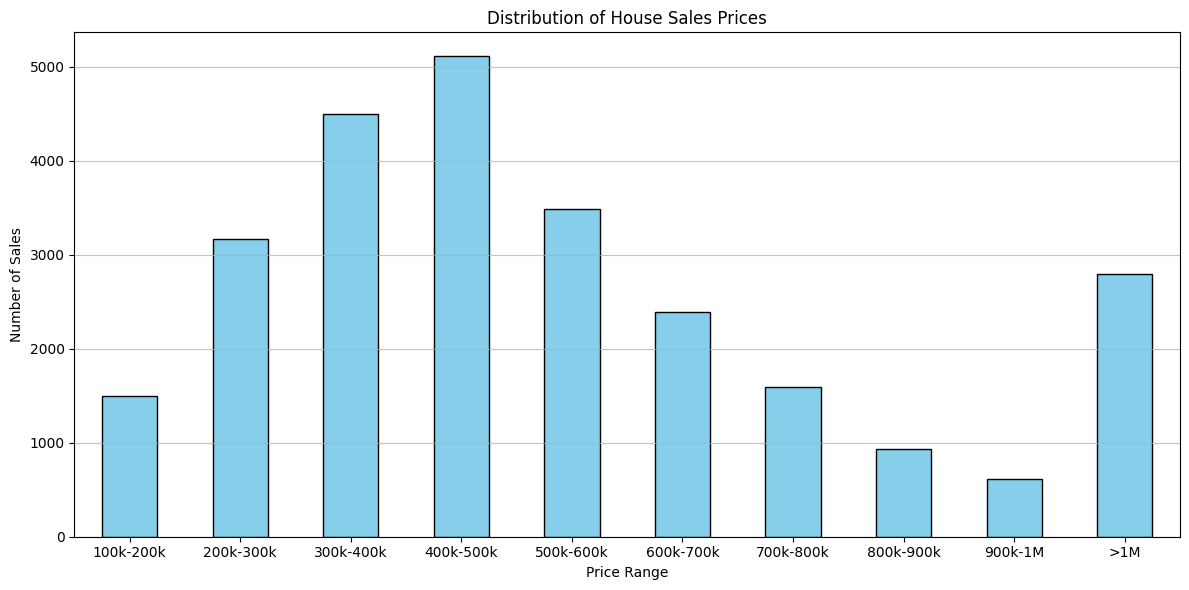

In [707]:
# Defining custom bins

bins = [-float('inf'), 200000, 300000, 400000, 500000, 
        600000, 700000, 800000, 900000, 1000000, float('inf')]
labels = ['100k-200k', '200k-300k', '300k-400k', 
          '400k-500k', '500k-600k', '600k-700k', 
          '700k-800k', '800k-900k', '900k-1M', '>1M']

# Adding a column for binned categories

df['price_range'] = pd.cut(df['sold_price'], bins=bins, labels=labels)

# Count the number of sales in each bin

price_distribution = df['price_range'].value_counts().sort_index()

# Plotting 

plt.figure(figsize=(12, 6))
price_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of House Sales Prices')
plt.xlabel('Price Range')
plt.ylabel('Number of Sales')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [708]:
# Right-skewed distribution

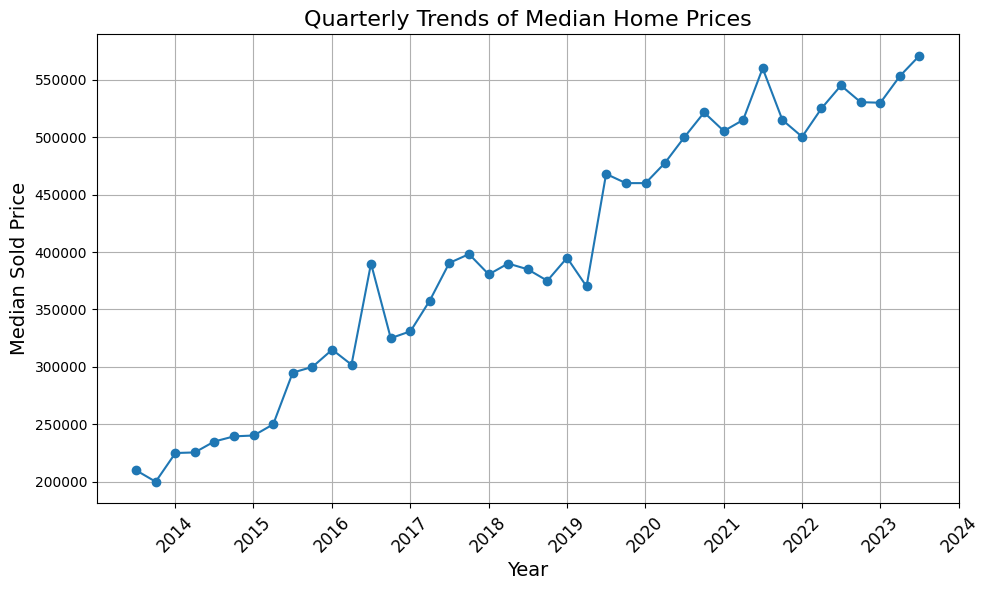

In [709]:
# Converting date strings to datetime format (MM/DD/YYYY)

df['sold_date'] = pd.to_datetime(df['sold_date'], format='%m/%d/%Y')

# Extracting year and quarter for grouping

df['year_quarter'] = df['sold_date'].dt.to_period('Q')

# Grouping and calculating median sold price

median_sold_prices = df.groupby('year_quarter')['sold_price'].median().reset_index()

# Plotting 

plt.figure(figsize=(10, 6))
plt.plot(median_sold_prices['year_quarter'].dt.to_timestamp(), median_sold_prices['sold_price'], marker='o')
plt.title('Quarterly Trends of Median Home Prices', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Sold Price', fontsize=14)

# Seting x-ticks to show only years

years = pd.date_range(start='2014-01-01', end='2024-12-31', freq='YE')
plt.xticks(years, [str(year.year) for year in years], rotation=45, fontsize=12)

plt.grid()
plt.tight_layout()
plt.show()

In [710]:
df['sold_price'] = pd.to_numeric(df['sold_price'], errors='coerce')

# Grouping by 'city' and computing statistics (min, mean, max, and count)

stats_zip = df.groupby(['city'])['sold_price'].agg(
    min='min',
    mean='mean',
    max='max',
    count='count'
).reset_index()

# Rounding

stats_zip['mean'] = stats_zip['mean'].round().astype(int)
stats_zip['min'] = stats_zip['min'].round().astype(int)
stats_zip['max'] = stats_zip['max'].round().astype(int)

# Excluding cities with less than 250 properties

filtered_stats = stats_zip[stats_zip['count'] >= 250]

top_3 = filtered_stats.nlargest(3, 'mean')
bottom_3 = filtered_stats.nsmallest(3, 'mean')

# Display

print("Top 3 Cities by Average Price:")
print(top_3)

print("\nBottom 3 Cities by Average Price:")
print(bottom_3)

# Excluding cities around the Lake Tahoe area

excluded_cities = ['Glenbrook', 'Incline Village', 'Zephyr Cove','Genoa','Stateline']
df_filtered = filtered_stats[~filtered_stats['city'].isin(excluded_cities)]
top_3_excluded = df_filtered.nlargest(3, 'mean')

# Display

print("\nTop 3 Cities by Average Price (Excluding Lake Tahoe area):")
print(top_3_excluded)


Top 3 Cities by Average Price:
               city     min     mean       max  count
4         Glenbrook  146000  2436279  27500000    355
5   Incline Village   25000  2251087  47500000    389
15      Zephyr Cove    7649  1492123  12600000    552

Bottom 3 Cities by Average Price:
            city    min    mean       max  count
14    Wellington  50000  264823   1225000    281
11    Sun Valley  86000  369257    625000    278
2   Gardnerville  15000  567807  12000000   3310

Top 3 Cities by Average Price (Excluding Lake Tahoe area):
          city    min    mean        max  count
8         Reno  75000  731074  300000000   5981
0  Carson City   1008  672278   18000000   8850
9       Sparks  98000  609615   12222005   2707


In [711]:
correlation_columns = ['type',
    'city',
    'beds', 
    'total_baths',
    'sqft',
    'year_built',
    'sold_price',
    'county',
    'stories',
    'parking_garage'
]

df = df[correlation_columns]
df

,type,city,beds,total_baths,sqft,year_built,sold_price,county,stories,parking_garage
0,CONDOS,Reno,1,1.0,570,1974,210000,Washoe,1,1
1,TOWNHOMES,Reno,2,1.5,1085,1988,400000,Washoe,2,2
2,CONDOS,Reno,2,2.0,1348,2005,485000,Washoe,3,2
3,SINGLE_FAMILY,Sparks,3,2.0,1706,2000,615000,Washoe,1,3
4,TOWNHOMES,Reno,2,2.0,1169,1973,400000,Washoe,1,2
...,...,...,...,...,...,...,...,...,...,...
26107,SINGLE_FAMILY,Genoa,3,2.0,2017,2003,420000,Douglas,0,3
26108,SINGLE_FAMILY,Gardnerville,3,2.0,1399,2002,277805,Douglas,0,3
26109,SINGLE_FAMILY,Glenbrook,0,0.0,2320,1985,630500,Douglas,2,0
26110,SINGLE_FAMILY,Stateline,3,3.0,2086,1976,537500,Douglas,0,2


In [712]:
from sklearn.preprocessing import LabelEncoder

# Converting categorical data into numeric

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df['city'] = label_encoder.fit_transform(df['city'])
df['county'] = label_encoder.fit_transform(df['county'])

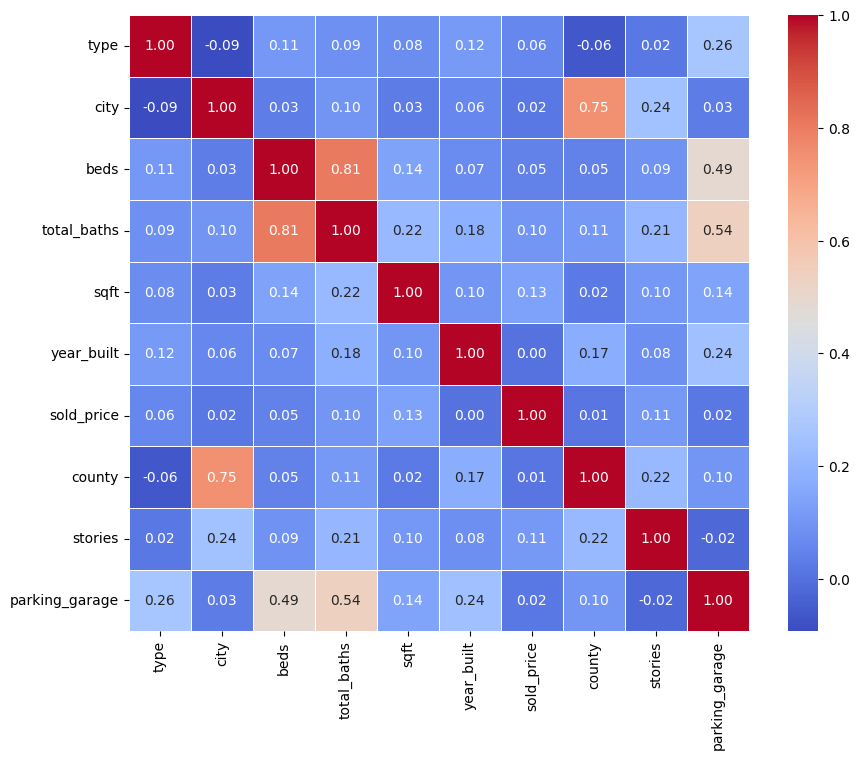

In [ ]:
correlation_matrix = df.corr()

# Plot

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [714]:
from sklearn.ensemble import RandomForestRegressor

# Defining features and target
X = df.drop(columns=['sold_price'])
y = df['sold_price']

# Initializing and training a RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Geting the feature importance
importances = model.feature_importances_

# Creating a DataFrame

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display

print(feature_importance_df)


          Feature  Importance
4            sqft    0.459128
5      year_built    0.354736
1            city    0.051838
3     total_baths    0.031364
8  parking_garage    0.029266
0            type    0.026654
6          county    0.018553
2            beds    0.016347
7         stories    0.012114


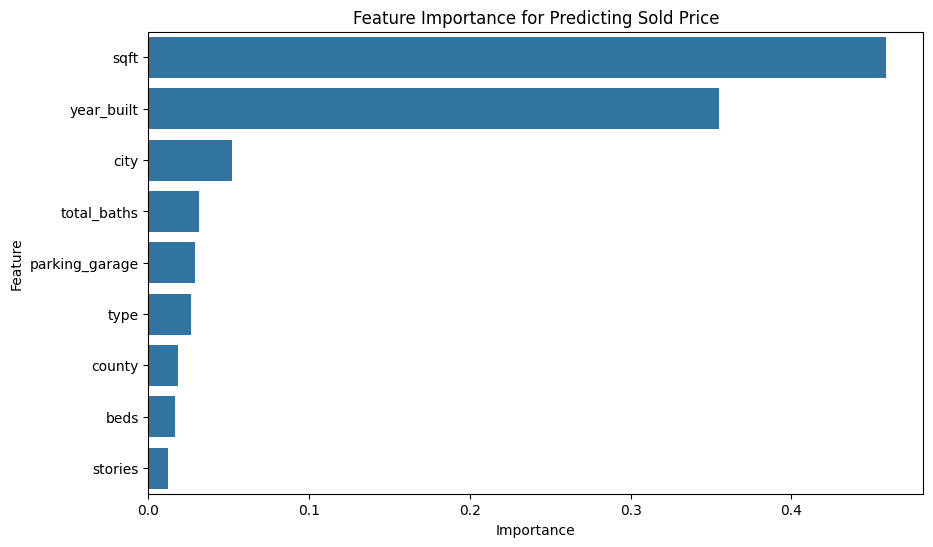

In [715]:
# Plot

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance for Predicting Sold Price')
plt.show()
